In [25]:
import pandas as pd 
from sklearn.externals import joblib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_teams(df):
    
    teams = []
    
    for i,cal in enumerate(df.iterrows()):
        teams.append(cal[1]["HomeTeam"])
        teams.append(cal[1]["AwayTeam"])

        if i == 9: 
            return teams


In [3]:
def build_features(df, teams):

    team_features = []
    
    for team in teams:
        #print team_a
        team_home = df[df['HomeTeam']==team]
        team_away = df[df['AwayTeam']==team]
        
        #shots made
        team_s    = team_away["AS"].sum()  + team_home["HS"].sum()
        #shots on-target made
        team_st   = team_away["AST"].sum() + team_home["HST"].sum()
        #shots conceded
        team_sc    = team_away["HS"].sum()  + team_home["AS"].sum()
        #shots on-target conceded
        team_stc   = team_away["HST"].sum() + team_home["AST"].sum()
        #corners awarded
        team_c    = team_away["AC"].sum()  + team_home["HC"].sum()
        #corners conceded
        team_cc    = team_away["HC"].sum()  + team_home["AC"].sum()

        team_features.append([team_s,team_sc,team_st,team_stc,team_c,team_cc])

    return team_features

In [4]:
def build_target(df, teams):

    team_target = []
    
    for team in teams:
        #print team_a
        t      = df[(df['HomeTeam']==team) | (df['AwayTeam']==team)]
        team_home = df[df['HomeTeam']==team]
        team_away = df[df['AwayTeam']==team]

        team_h_win = len(team_home[team_home['FTHG']>team_home['FTAG']])
        team_a_win = len(team_away[team_away['FTAG']>team_away['FTHG']])
        team_draw = len(t[t['FTAG']==t['FTHG']])

        team_points = 3*team_a_win + 3*team_h_win + team_draw
        team_target.append(team_points)

    return team_target


In [12]:
df_en = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv")
df_it = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/I1.csv")
df_de = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/D1.csv")
df_es = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/SP1.csv")


In [13]:
teams_en = get_teams(df_en)
teams_it = get_teams(df_it)
teams_de = get_teams(df_de)
teams_es = get_teams(df_es)

In [20]:
feat_en = build_features(df_en,teams_en)
feat_it = build_features(df_it,teams_it)
feat_de = build_features(df_de,teams_de)
feat_es = build_features(df_es,teams_es)

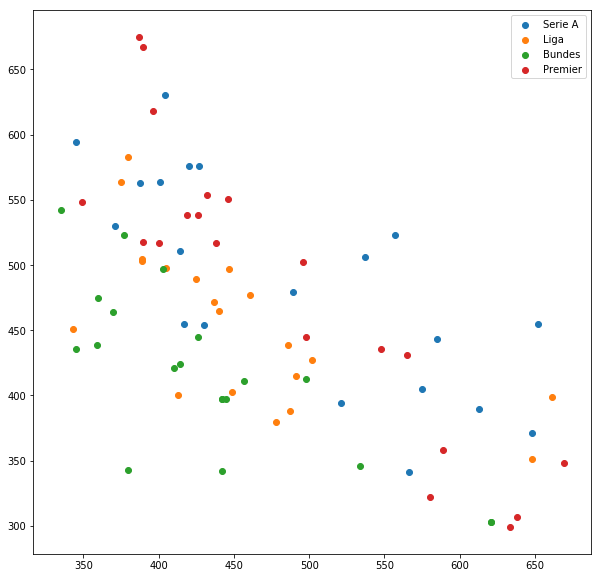

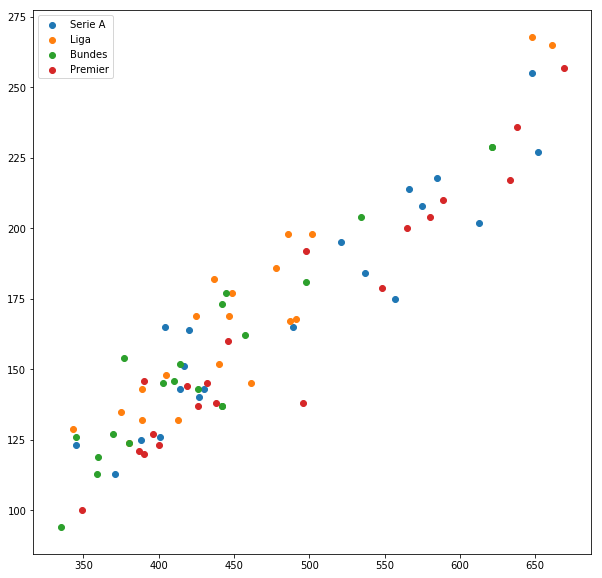

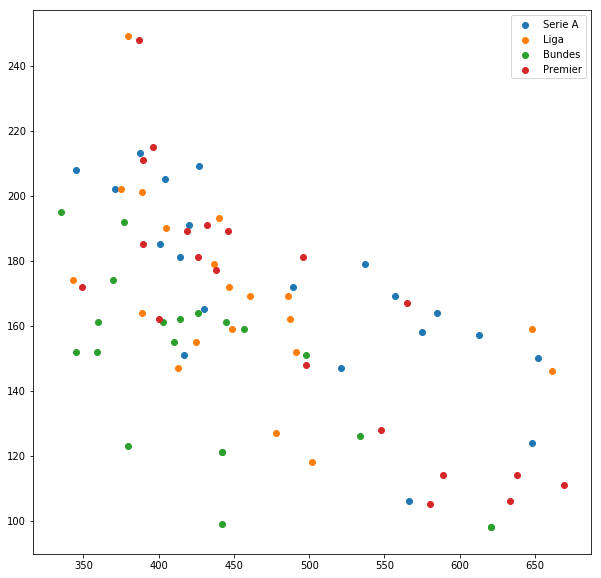

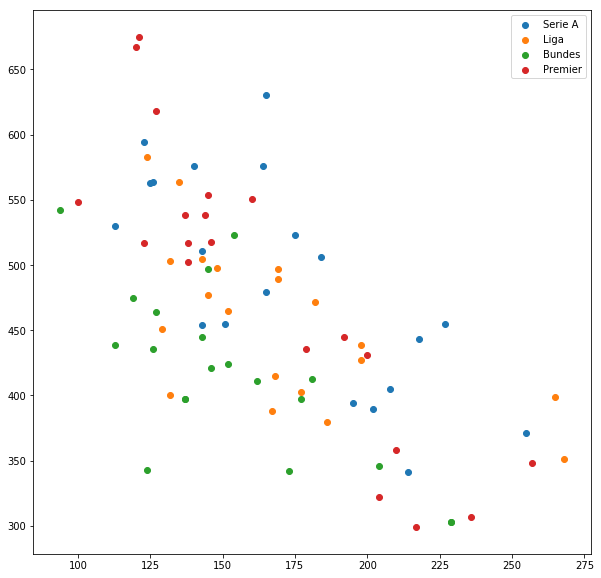

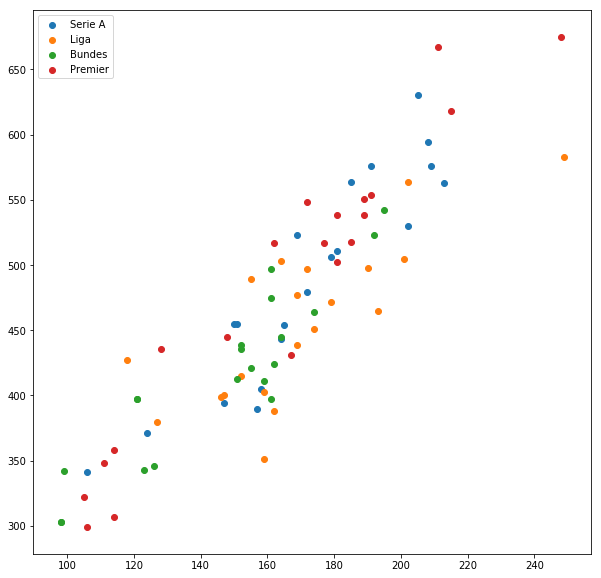

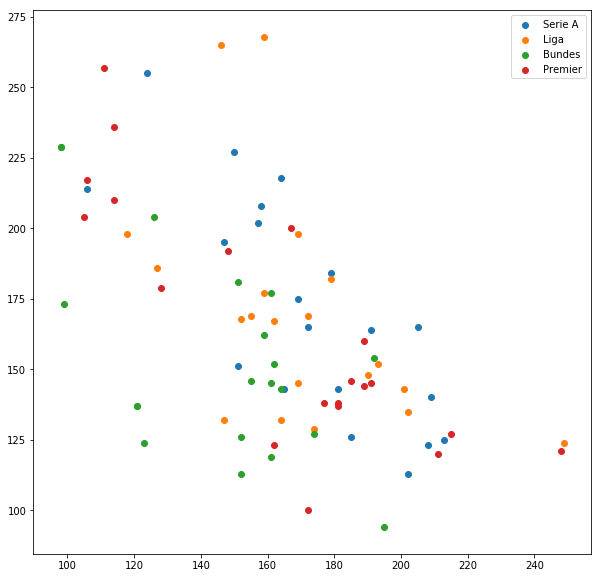

In [ ]:
couples = [[0,1],[0,2],[0,3],[2,1],[3,1],[3,2]]
for c in couples:
    plt.figure(figsize=(10,10))
    feat1_it = [x[c[0]] for x in feat_it]
    feat2_it = [x[c[1]] for x in feat_it]
    plt.scatter(feat1_it,feat2_it,label="Serie A")
    feat1_es = [x[c[0]] for x in feat_es]
    feat2_es = [x[c[1]] for x in feat_es]
    plt.scatter(feat1_es,feat2_es,label="Liga")
    feat1_de = [x[c[0]] for x in feat_de]
    feat2_de = [x[c[1]] for x in feat_de]
    plt.scatter(feat1_de,feat2_de,label="Bundes")
    feat1_en = [x[c[0]] for x in feat_en]
    feat2_en = [x[c[1]] for x in feat_en]
    plt.scatter(feat1_en,feat2_en,label="Premier")
    plt.legend()
    plt.show()


In [13]:
ranking  = []
realrank = []

for t,p,tg in zip(teams_1617,pred_1617,targ_1617):
    ranking.append((t, p, tg))
    
for t,p in zip(teams_1617,targ_1617):
    realrank.append((t, p))


In [17]:
print('Variance score: %.2f' % model_1.score(feat_1617, targ_1617))
print("Residual sum of squares: %.2f"
      % np.mean((model_1.predict(feat_1617) - targ_1617) ** 2))

Variance score: 0.63
Residual sum of squares: 26.33


In [23]:
print targ_1617
print model_1.predict(feat_1617)

[36, 23, 32, 18, 28, 28, 16, 6, 19, 21, 10, 22, 20, 20, 32, 25, 6, 17, 8, 28]
[ 29.37067023  24.38342338  29.68291943  19.47851403  21.08370007
  24.05765331  14.88181823  11.55074775  16.24164547  27.59179919
  12.91220621  23.49038088  18.46895131  15.03955121  20.60065717
  26.18245254  11.79521552  18.84039917  18.76509135  30.20139132]
